<a href="https://colab.research.google.com/github/jeffersonvicente2021/sigmoidal-learn/blob/main/Analisando_os_Dados_do_Airbnb_25_09_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Neste *notebook*, iremos analisar os dados referentes à cidade ***Singapura***, e ver quais insights podem ser extraídos a partir de dados brutos.

## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2023-09-03/visualisations/listings.csv')

## Análise dos Dados

Nessa etapa iremos discriminar todas as variavies e suas nomeclaturas dispostas no DataFrame a ser analisado, ressalta-se que os dados estão estruturados em um formato csv.

**Dicionário das variáveis**

* `id` - número id que identifica os imóveis
* `name` - nome da propriedade anunciada
* `host_id` - número id do proprietário (anfitirão) da propriedade
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo do quarto anunciado
* `price` - preço para alugar o imóvel
* `minimum_nigths` - quantidade mínima de noites que podem ser reservadas
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `review_per_moth` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias



Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [7]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,761411,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,4013546,Xsjong,NaN,Noord-Oost,52.40164,4.95106,Private room,61,3,303,2023-08-19,2.30,2,272,26,0363 D4AD DCF3 E72A 56A2
1,768274,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,3678216,J & R,NaN,Westerpark,52.38855,4.88521,Entire home/apt,327,3,78,2023-08-16,0.64,1,16,6,0363 7A50 18E7 51D1 B7F9
2,768737,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,3877342,Nicole,NaN,Westerpark,52.37824,4.86826,Private room,109,2,341,2023-08-24,2.73,3,29,43,036396BE30827DDB9575
3,771217,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,4068486,Danielle,NaN,Zuid,52.34091,4.84802,Entire home/apt,290,3,10,2019-01-02,0.11,1,0,0,0363 D807 AD6C 499A F871
4,771343,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,2313061,Marcel,NaN,Centrum-West,52.37641,4.88303,Private room,150,1,699,2023-09-01,6.62,2,196,110,0363 8C61 E9B9 5582 913E


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Prosseguindo vamos identificar a quantidade de entradas que nosso conjunto de dados possui e ver o tipo de cada coluna.

O *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo listings.csv. Há uma versão mais completa chamada (listings.csv.bz)

In [8]:
# identificar o volume de dados do DataFrame
print('Entradas:\t {} '.format(df.shape[0])) #shape 0 refere-se q quantidade de linhas
print('Variáveis:\t {} '.format(df.shape[1])) #shape 1 refere-se a quantidade de colunas
# verificar os tipos de variáveis do dataset
display(df.dtypes)

Entradas:	 8386 
Variáveis:	 18 


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
Pela quantidade de valores ausentes conseguimos indentificar a qualidade de um *dataset*. É importante logo no início, identifarmos a quantidade de valores nulos e se impactam de forma significativa a análise estatística do Data Frame.


1.  É possível constatar que a coluna `neighbourhood_group` possui 100% dos valores faltantes
2.   As variáveis `reviews_per_moth` e `last_review` possuem mais de 30% de valores nulos/ausentes
2.   As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.



In [9]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.098974
last_review                       0.098974
license                           0.002146
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Com o intuito de identificar a distribuição das variáveis e identificar possíveis `oulier`, irei plotar os histogramas e suas respectivas variáveis.

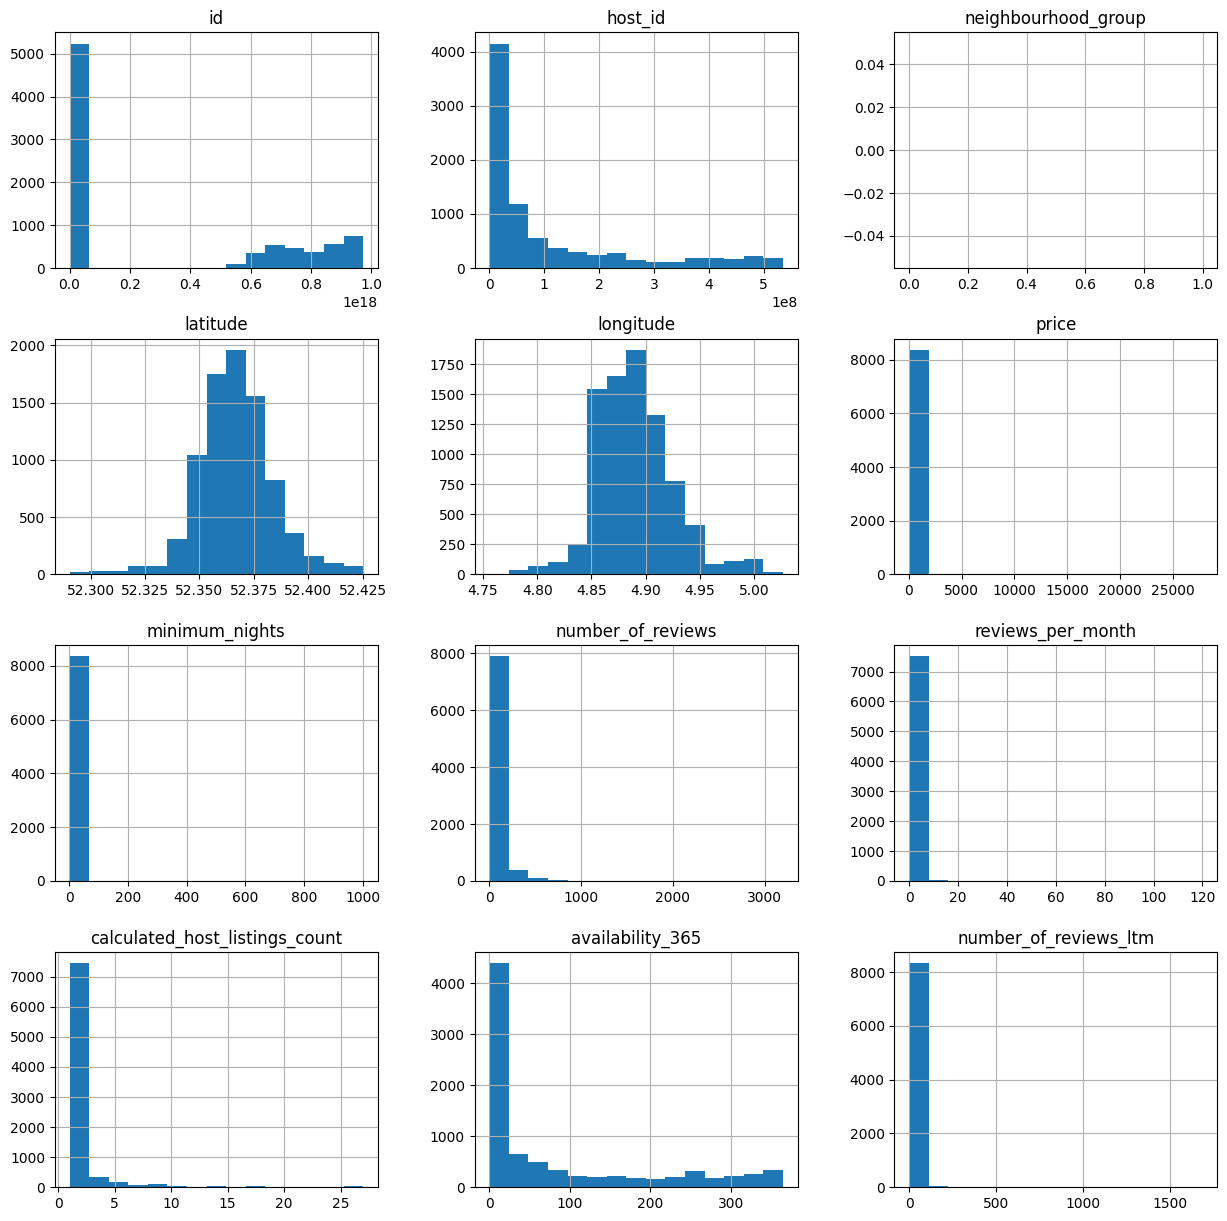

In [10]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,15));

### **Q4. Qual a média dos preços de aluguel?**

A média atual do histograma dos preços conforme o comando `df.price.mean` é de R$254,48

In [11]:
# ver a média da coluna `price``
df.price.mean()

254.48986405914619

In [12]:
#vendo o resumo estatistico
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8386.000000,8386.000000,8386.000000,7556.000000,8386.000000,8386.000000
mean,254.489864,5.046625,45.437753,1.175696,1.831624,82.825066
std,395.468275,34.710395,107.352805,2.253706,2.857336,113.568083
min,18.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,150.000000,2.000000,3.000000,0.270000,1.000000,0.000000
50%,207.000000,3.000000,10.000000,0.580000,1.000000,18.000000
75%,300.000000,4.000000,36.000000,1.240000,1.000000,142.000000
max,27857.000000,1001.000000,3199.000000,120.110000,27.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 529, porém seu valor máximo é 623592.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

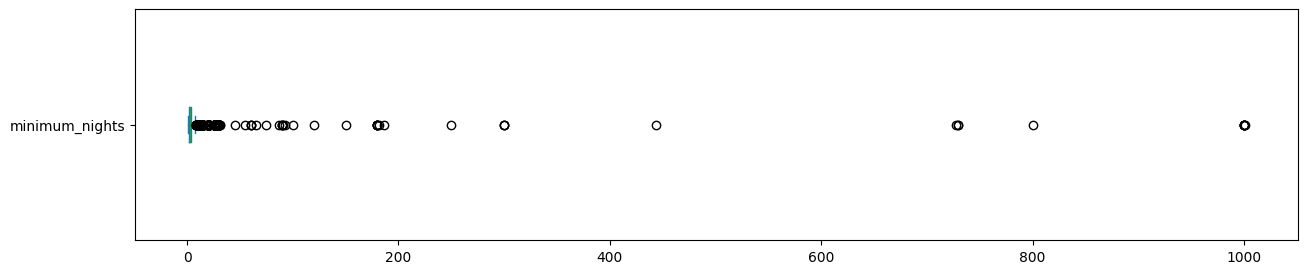

minimum_nights: valores acima de 30:
41 entradas
0.4889%


In [13]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

 #### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

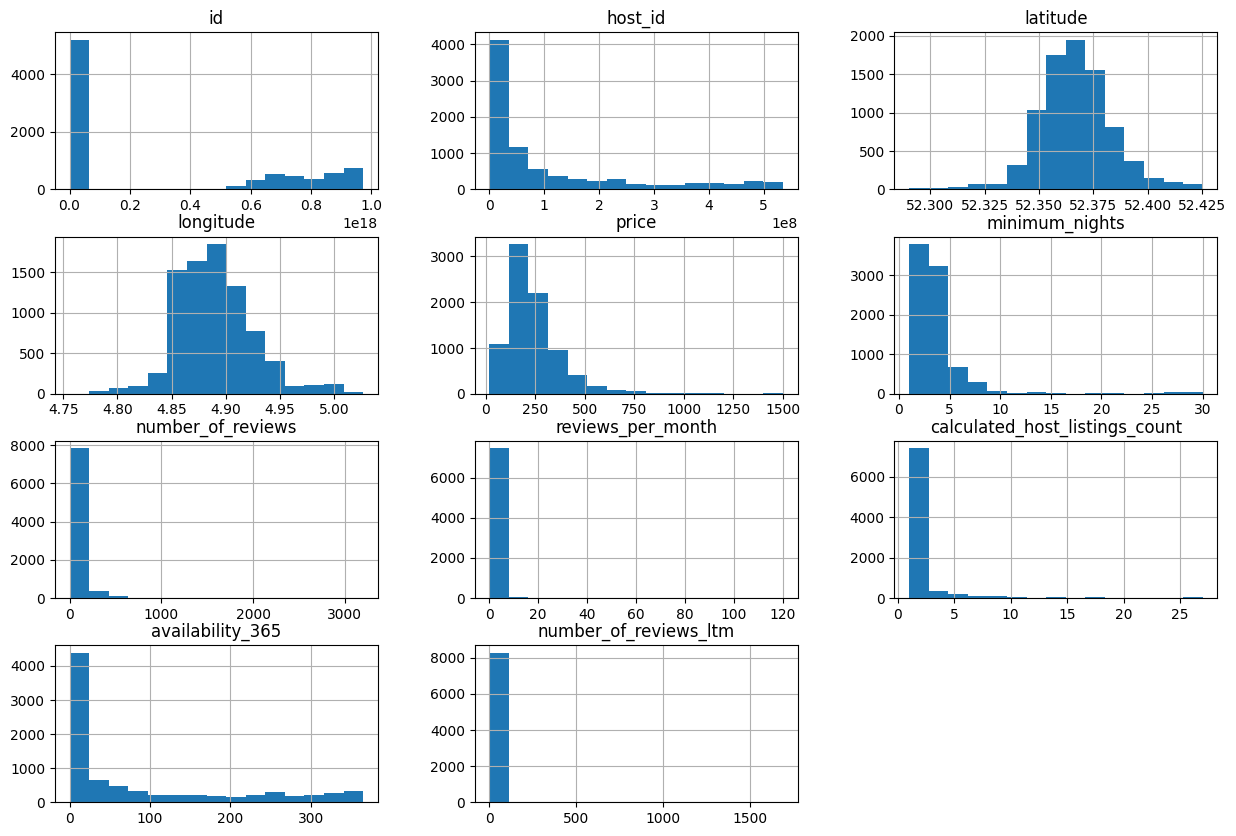

In [14]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação indica que existem uma relação entre duas coisas. No nosso contexto vamos buscar relação entre duas variáveis ou mais.

Existe formas dessa relação ser medida, e é função do coeficiente de correlação establecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, deve-se:


*   Criar uma matriz de correlação
*   Gerar um heatmap a partir dessa matriz, usando a biblioteca `seaborn`




In [15]:
from numpy import minimum
# criar uma matriz de correlação
corr = df_clean[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.031589,-0.168372,-0.100863,0.000112,0.155541
minimum_nights,-0.031589,1.000000,-0.116765,-0.140951,-0.049968,-0.037042
number_of_reviews,-0.168372,-0.116765,1.000000,0.729104,0.030210,0.170534
reviews_per_month,-0.100863,-0.140951,0.729104,1.000000,0.096566,0.219751
calculated_host_listings_count,0.000112,-0.049968,0.030210,0.096566,1.000000,0.283518
availability_365,0.155541,-0.037042,0.170534,0.219751,0.283518,1.000000


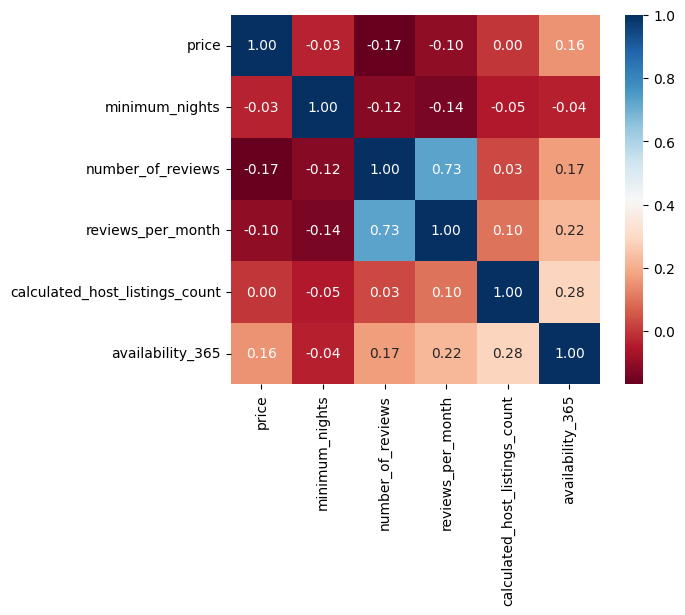

In [16]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A partir dos dados já obtidos indentificamos a variável `room_type` que indica o tipo de locação que está anunciada no Airbnb.
É comum nesses tipos de sites a disponibilidade de aluguel tanto de apartamento como de casa e outros, dado que muitos viajantes as vezes dividem quartos para diminuir os custos.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`

In [18]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    6428
Private room       1802
Hotel room           54
Shared room          42
Name: room_type, dtype: int64

In [19]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.772039
Private room       0.216430
Hotel room         0.006486
Shared room        0.005044
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Singapore?**

Uma alternativa para verificar uma variável em função da outras é usando o comando `groupby()`. No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.

Para os valores serem apresentados de forma descrecente informamos dentro do comando sort_values o comando ***ascending=False*** e colocamos como parâmetros apenas as 10 primeiras saída [:10]

In [23]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Centrum-West                285.467742
Centrum-Oost                283.957908
Zuid                        273.905405
De Pijp - Rivierenbuurt     268.953813
De Baarsjes - Oud-West      246.143687
IJburg - Zeeburgereiland    234.966667
Watergraafsmeer             231.942748
Westerpark                  231.590361
Oud-Oost                    229.695050
De Aker - Nieuw Sloten      223.972973
Name: price, dtype: float64

Acima, vemos os locais Centrum-West, Centrum-Oost, Zuid e outros como os lugares mais caros por diárias.

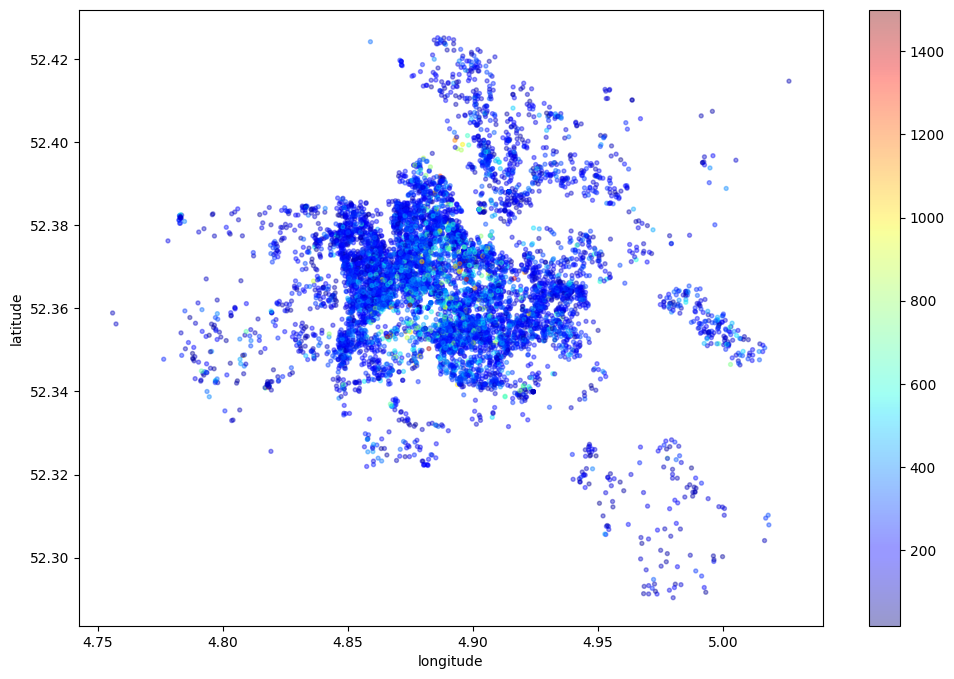

In [24]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

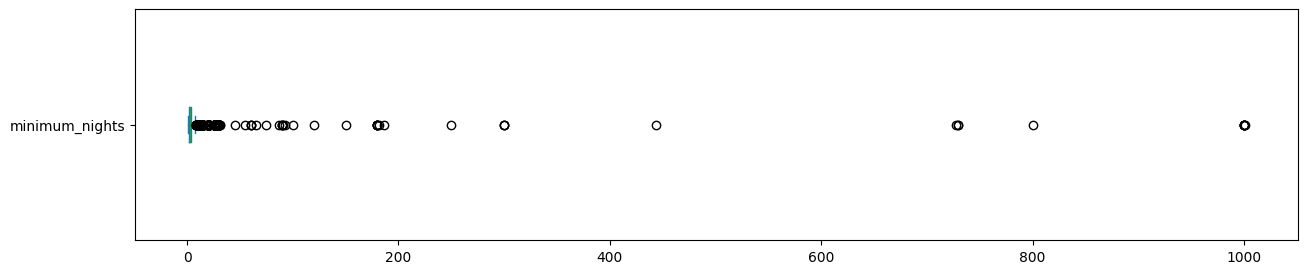

minimum_nights: valores acima de 30:
41 entradas
0.4889%


In [26]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

## Conclusões


Foi feita uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas variáveis como preço e outros o que mascara a fidelidade dos dados em muitas análises.

Finalizando, essa análise simples e inicial foi feita com o banco de dados resumido, a próxima análise e mais profunda será realizada usando o dataset completo com 106 atributos disponíveis para análise